#**Importance of File Handling:**

It is crucial for storing data permanently in files.

####**File:** is a named location on disk used to store related information

####**Non-Volatile Storage:** Files allow access to stored information even after the program terminates.

###**File Formats:** Files can be in text or binary format.

### Each line in a file ends with a special character (typically a newline character).

# **Opening a File in Python**
```
file = open("filename.txt", "mode","encoding")
file.close()
```
**filename.txt:** The name of the file (can include a path if needed).

**mode:** Specifies the purpose of opening the file (e.g., read, write, append).


**Mode**------------**Description**

**"r"**------------Read (default mode, opens for reading text) require file exist

**"w"**------------	Write (creates a new file or overwrites existing content)

**"a"**------------Append (adds data to the end of an existing file).
Creates a new file if not exist

**"r+"**	------------Read and write (file must exist).

**"b"**-----------Binary mode (e.g., "rb" or "wb" for binary files).


#**buffering will be explaind**

**encoding = "utf8"** by default which is Standard (supports all languages)


#**opening and closing a file in robust way**
 1- When opening a file in Python, always use **try-except** to handle potential errors gracefully like that

```
try:
    with open("file.txt", "r") as f:
        content = f.read()
except FileNotFoundError:
    print("File not found!")
except IOError as e:
    print(f"I/O Error: {e}")

```
#**Why Use try-except?**
**FileNotFoundError**

Triggered if the file doesn’t exist.

**PermissionError**

Occurs if the program lacks read/write permissions.

**UnicodeDecodeError**

Happens when reading non-text files with text mode (or encoding mismatches).

**General Exception**

Catches unforeseen issues (e.g., disk failure).

#**Closing Files**

 Always close the file after operations to free resources by using:
#### **- close()**
#### **- with statement :** to close file automaticlly "recommended"


# **Reading Files**

**read():** Outputs the entire file as one string.

**readline():** Reads lines one at a time (cursor moves forward).

**readlines():** Returns a list where each element is a line (includes \n).

**Iteration (for line in f)**:Most memory-efficient for large files (no full load).

**read(n):**  Reads n characters at a time (useful for binary files).

**pathlib:** Modern alternative with concise syntax.

# **Examples On Reading Files**

In [ ]:
try:
    # ===== METHOD 1: read() - Entire file as a single string =====
    print("\nMethod 1: read()")
    with open("/content/sample.txt", "r") as f:
        content = f.read()  # Returns entire content as a string
    print(content)
except Exception as e:
    print(f"An error occurred while processing the file: {e}")
    print("Please check if the file exists and you have proper permissions.")
else:
  print("File read successfully!\n")  # Executes if no exceptions occur


Method 1: read()
An error occurred while processing the file: [Errno 2] No such file or directory: '\\content\\sample.txt'
Please check if the file exists and you have proper permissions.


In [ ]:
try:
    # ===== METHOD 2: readline() - Line by line (manual control) =====
    print("\nMethod 2: readline()")
    with open("sample.txt", "r") as f:
        line1 = f.readline()  # Reads just the first line (includes '\n')
        line2 = f.readline()  # Reads the next line
    print(f"Line 1: {line1.strip()}\nLine 2: {line2.strip()}")
except Exception as e:
    print(f"An error occurred while processing the file: {e}")
    print("Please check if the file exists and you have proper permissions.")

else:
  print("File read successfully!\n")  # Executes if no exceptions occur

In [ ]:
try:
    # ===== METHOD 3: readlines() - All lines as a list =====
    print("\nMethod 3: readlines()")
    with open("sample.txt", "r") as f:
        lines = f.readlines()  # Returns list of lines (each includes '\n')
        for i in range(len(lines)):
            lines[i] = lines[i].strip()  # Remove trailing '\n'
    print(f"All lines as list: {lines}")
except Exception as e:
    print(f"An error occurred while processing the file: {e}")
    print("Please check if the file exists and you have proper permissions.")
else:
  print("File read successfully!\n")  # Executes if no exceptions occur


Method 3: readlines()
All lines as list: ['First line', 'Second line', 'Third line', 'Fourth line', 'Fifth line']
File read successfully!



In [ ]:

try:
    # ===== METHOD 4: Iterate directly (memory-efficient) =====
    print("\nMethod 4: Iteration (for line in file)")
    with open("sample.txt", "r") as f:
        for line in f:  # Lazy iteration (best for large files)
            print(f"Line: {line.strip()}")
except Exception as e:
    print(f"An error occurred while processing the file: {e}")
    print("Please check if the file exists and you have proper permissions.")

else:
  print("File read successfully!\n")  # Executes if no exceptions occur


Method 4: Iteration (for line in file)
Line: First line
Line: Second line
Line: Third line
Line: Fourth line
Line: Fifth line
File read successfully!



In [ ]:
try:
    # ===== METHOD 5: read(n) - Fixed-size chunks =====
    print("============ Method 5: read(n) - Chunked reading ==============")
    with open("/content/sample.txt", "r") as f:                                      #Without the Walrus Operator := you must calc chunck =f.read() before while and then say while chunk
        while chunk := f.read(5):  # Reads 5 characters at a time
            chunk.strip('\n')
            print(f"Chunk:{chunk}", end="")
except Exception as e:
    print(f"An error occurred while processing the file: {e}")
    print("Please check if the file exists and you have proper permissions.")
else:
    print("File read successfully!\n")  # Executes if no exceptions occur

============ Method 5: read(n) - Chunked reading ==============
Chunk:ahmed
Chunk:
alaa
Chunk:
samy
Chunk:e
nag
Chunk:eh
File read successfully!



In [ ]:
file_path = "/content/example.txt"

try:
    with open(file_path, "r") as file:  # Default mode is "r" (read)
        content = file.read()
        print("File content:\n", content)

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found!")

except PermissionError:
    print(f"Error: No permission to read '{file_path}'.")

except UnicodeDecodeError:
    print(f"Error: Could not decode '{file_path}' (use binary mode or check encoding).")

except Exception as e:  # Catch-all for unexpected errors
    print(f"Unexpected error: {e}")

else:
    print("File read successfully!")  # Executes if no exceptions occur

finally:
    print("File operation attempted.")  # Always runs (cleanup goes here)

Error: File '/content/example.txt' not found!
File operation attempted.


In [ ]:
# Create a sample file with text
with open("sample.txt", "w") as f:
    f.write("""First line
Second line
Third line
بسم الله
Fifth line""")

#**Writting to File**

Once the file is opened, you can write data to it using one of the following methods:

#**1. write():** Write a string to the file and has two modes 'a' or 'w'


#**2. writelines():** Write a list or tuple of strings to the file

In [ ]:
#Note: writelines() doesn’t add newlines automatically—you must include \n yourself.
lines = ["Line 1\n", "Line 2\n", "Line 3\n"]
with open("example.txt", "w") as file:
    file.writelines(lines)

In [ ]:
try:
    with open("sample.txt", "a") as file:   #gives yo
        file.write("Attempting to write to a file.\n")
except IOError as e:
    print(f"Error writing to file: {e}")

<_io.BufferedWriter name='sample.txt'>


#**What is Full Buffering?**

In full buffering, Python writes data to a memory buffer (e.g., 4096 bytes = 4KB) instead of writing directly to disk every time. Once the buffer is full (or the file is closed), all data is written to disk in one go. This is much faster for big files.

# **Buffering Parameter in open()**
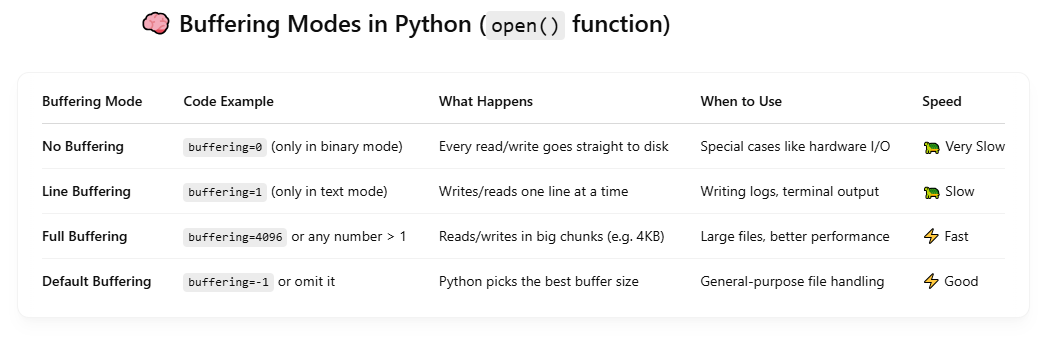

In [ ]:
#No Buffering (buffering=0 — binary mode only)
with open("file_no_buffer.txt", "wb", buffering=0) as f:
    for i in range(5):
        f.write(b"Hello, World!\n")

#Effect: Each write() goes directly to disk = slow
#Must use binary mode ("wb") — won't work in text mode

In [ ]:
# Line Buffering (buffering=1 — text mode only)
with open("file_line_buffer.txt", "w", buffering=1) as f:
    for i in range(5):
        f.write("Hello, World!\n")  # data buffered line by line

In [ ]:
#Full Buffering (buffering=4096, or any big number)
with open("file_full_buffer.txt", "w", buffering=4096) as f:
    for i in range(50):
        f.write("Hello, World!\n")  # written to memory first
    # Not written to file until buffer is full or file is closed
# Effect: Data stays in RAM until buffer fills up or file is closed
# Much faster for large file writes

In [ ]:
#Default Buffering (buffering=-1 or just omit it)

with open("file_default_buffer.txt", "w") as f:  # same as buffering=-1
    for i in range(500):
        f.write("Hello, World!\n")
#Effect: Python picks the best buffering size for the system
#Safe and works well for general use

In [ ]:
#dealing with the buffer directly
import time
start_time = time.time()
with open("buffer_file_2.txt",'wb') as file:
  for i in range(100000):
    #file.write(b'Hello, World!\n')   #without b you get error
    file.write(f"Line {i}\n".encode())  # Convert string to bytes is faster

end_time = time.time()
print(f"Time taken: {end_time - start_time} seconds")


Time taken: 0.042768001556396484 seconds


In [ ]:
import time

# Without buffering (writing directly to the disk)
start_time = time.time()
with open("example_no_buffer.txt", "wb", buffering=0) as file:
    for i in range(100000):
        file.write(f"Line {i}\n".encode())  # Write as bytes in binary mode
end_time = time.time()
print(f"Writing without buffering took {end_time - start_time} seconds.")

# With buffering (writing in memory before writing to disk)
start_time = time.time()
with open("example_with_buffer.txt", "w", buffering=1024) as file:
    for i in range(100000):
        file.write(f"Line {i}\n")  # Write text data
end_time = time.time()
print(f"Writing with buffering took {end_time - start_time} seconds.")

# With buffering and flush (manual flushing after each write)
#data being buffered then flushed from the buffer to the disk
start_time = time.time()
with open("example_with_flush.txt", "w", buffering=1024) as file:
    for i in range(100000):
        file.write(f"Line {i}\n")  # Write text data
        file.flush()  # Manually flush the buffer to the disk after each write
end_time = time.time()
print(f"Writing with buffering and flush took {end_time - start_time} seconds.")


Writing without buffering took 0.2209928035736084 seconds.
Writing with buffering took 0.030662059783935547 seconds.
Writing with buffering and flush took 0.42772984504699707 seconds.


#**File vs File buffer**
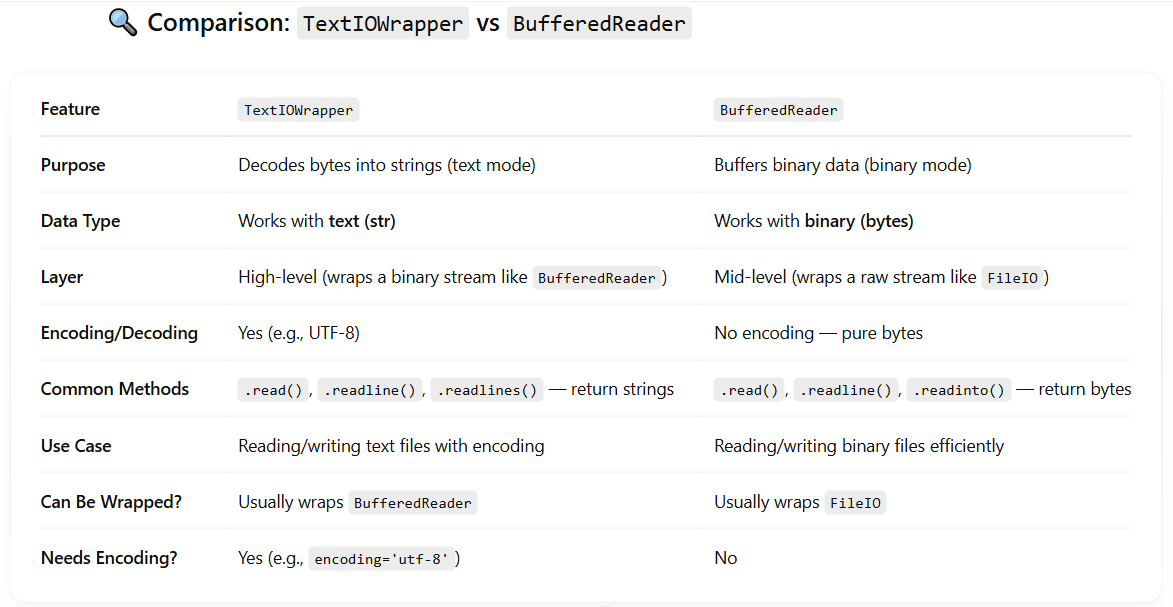

#**File**
This is the text-mode file object you get from open().

when you say file = open(...) you create an instance of TextIOWrapper.

It automatically decodes bytes (like UTF-8) into strings.

When you do for line in file, you get strings.

✅ file.buffer
This gives you the underlying binary buffer object.

It's a _io.BufferedReader in read mode.

It works with raw bytes, not decoded text.

When you do for line in file.buffer, you get byte strings like b"Hello\n".

#**flush() : forces Writing buffer to disk**
Python pushes the contents of memory (buffer) to the disk manually.

This is optional — it also happens automatically at some points:

when buffer is full

when file is closed

if buffering=1, when newline is written

#**Key Topics for Data Engineers with .txt Files**
File Reading and Writing (including handling large files)

String Manipulation and Text Processing

Regular Expressions for pattern matching and extraction

File I/O Performance (buffering, flushing, memory management)

Delimited File Parsing (e.g., CSV-like text files)

Error Handling and Context Management

File Compression and decompression

Directory and File Operations

Data Transformation and Summarization

Working with Large Datasets (chunked processing)


**Creating data**

In [1]:
import csv  # Import the csv module for working with CSV files.
import os  # Import the os module for interacting with the operating system (e.g., creating directories).
from random import choice, randint  # Import functions for random selection and integer generation.
from datetime import datetime, timedelta  # Import classes for working with dates and times.

# Create directories if they don't exist. 'exist_ok=True' prevents errors if the directory already exists.
os.makedirs("data/raw", exist_ok=True)

# Sample data for complaint types, descriptors, cities, and zip codes.
complaint_types = ["Noise", "Blocked Driveway", "Illegal Parking", "Water Leak", "Street Condition"]
descriptors = {
    "Noise": ["Loud Music/Party", "Banging/Pounding", "Car/Truck Horn"],
    "Blocked Driveway": ["No Access", "Partial Access", "Vehicle Blocking"],
    "Illegal Parking": ["Double Parked", "In Front of Hydrant", "Blocking Driveway"],
    "Water Leak": ["Hydrant Running", "Broken Main", "Flooding"],
    "Street Condition": ["Pothole", "Cracked Pavement", "Sinkhole"]
}
cities = ["BROOKLYN", "QUEENS", "MANHATTAN", "BRONX", "STATEN ISLAND"]
zips = ["11218", "11385", "10001", "10453", "10301"]

# Generate sample data
rows = []
start_date = datetime(2025, 1, 1)  # Set a starting date for the sample data.
for i in range(100):  # Generate 100 sample rows.
    comp_type = choice(complaint_types)  # Randomly select a complaint type.
    row = {  # Create a dictionary for each row.
        "Unique Key": f"1000{i:04d}",  # Generate a unique key for each row.
        "Created Date": (start_date + timedelta(minutes=randint(0, 100000))).strftime("%Y-%m-%d %H:%M:%S"),  # Generate a random date and time.
        "Complaint Type": comp_type,  # Add the complaint type.
        "Descriptor": choice(descriptors[comp_type]),  # Randomly select a descriptor based on complaint type.
        "City": choice(cities),  # Randomly select a city.
        "Incident Zip": choice(zips)  # Randomly select a zip code.
    }
    rows.append(row)  # Append the row to the list of rows.

# Write the sample data to a tab-separated .txt file
output_file = "data/raw/nyc_311_sample.txt"
with open(output_file, "w", encoding="utf-8", newline="") as f:  # Open the file in write mode.
    writer = csv.DictWriter(f, fieldnames=rows[0].keys(), delimiter="\t")  # Create a csv writer object.
    writer.writeheader()  # Write the header row.
    writer.writerows(rows)  # Write the data rows.

output_file  # Display the output file path (for confirmation).


'data/raw/nyc_311_sample.txt'

#**1- Text Processing and String Manipulation**

**Splitting text:** Master how to process text using string methods like split(), join(), strip(), and regular expressions.

**Regular Expressions (Regex):**
 Learn how to use regex for pattern matching and extracting relevant information from text files (e.g., log file parsing, extracting specific data from unstructured text).

Example: Extracting email addresses with regex